In [ ]:

"""
This is how the dataset numericals.csv was created

Generate synthetic data
np.random.seed(42)
X = np.random.rand(400) * 10  # Independent variable X
noise = np.random.normal(0, 1, 400)  # Noise for Y
Y = 2 * X + 3 + noise  # Dependent variable Y (with added noise)


Create a DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

"""

X=3.7454 | Y=11.7963 | Y_cap=10.4661 | Residual=1.3302
X=9.5071 | Y=22.0353 | Y_cap=21.9682 | Residual=0.0671
X=7.3199 | Y=18.3218 | Y_cap=17.6019 | Residual=0.7199
X=5.9866 | Y=14.6629 | Y_cap=14.9402 | Residual=-0.2773
X=1.5602 | Y=6.4445 | Y_cap=6.1038 | Residual=0.3407
X=1.5599 | Y=5.9897 | Y_cap=6.1033 | Residual=-0.1136
X=0.5808 | Y=4.2587 | Y_cap=4.1488 | Residual=0.1099
X=8.6618 | Y=20.9187 | Y_cap=20.2806 | Residual=0.6381
X=6.0112 | Y=14.2041 | Y_cap=14.9892 | Residual=-0.7851
X=7.0807 | Y=19.2538 | Y_cap=17.1244 | Residual=2.1295
X=0.2058 | Y=2.4057 | Y_cap=3.4002 | Residual=-0.9945
X=9.6991 | Y=21.1840 | Y_cap=22.3514 | Residual=-1.1674
X=8.3244 | Y=20.8070 | Y_cap=19.6072 | Residual=1.1998
X=2.1234 | Y=8.0384 | Y_cap=7.2281 | Residual=0.8103
X=1.8182 | Y=7.2606 | Y_cap=6.6190 | Residual=0.6416
X=1.8340 | Y=7.2964 | Y_cap=6.6505 | Residual=0.6459
X=3.0424 | Y=9.0726 | Y_cap=9.0628 | Residual=0.0098
X=5.2476 | Y=12.5979 | Y_cap=13.4649 | Residual=-0.8670
X=4.3195 | Y=11.7147

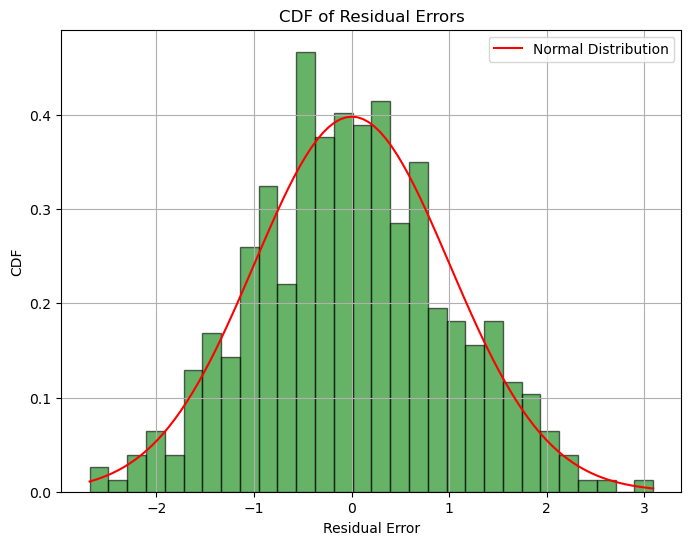

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading dataset
df = pd.read_csv('numericals.csv')

# Extracting X and Y from the dataset
X = df['X'].values
Y = df['Y'].values

# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fitting linear regression model
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

# Estimating coefficients
beta_0_cap = regressor.intercept_
beta_1_cap = regressor.coef_[0]

# Calculate predicted Y values
y_cap = beta_0_cap + beta_1_cap * X

# Calculate residual errors
residuals = Y - y_cap

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(residuals, 'norm')



# Construct a table
for i in range(len(X)):
    print(f"X={X[i]:.4f} | Y={Y[i]:.4f} | Y_cap={y_cap[i]:.4f} | Residual={residuals[i]:.4f}")


# Model Summary
y_pred_train = regressor.predict(X_train.reshape(-1, 1))
y_pred_test = regressor.predict(X_test.reshape(-1, 1))

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)


# Model Summary
print("Model Summary:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"\nEstimated beta_0_cap: {beta_0_cap:.4f}")
print(f"Estimated beta_1_cap: {beta_1_cap:.4f}")
print(f"p_value: {p_value:.4f}")
print(f"\nK-S Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot CDF of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
plt.title("CDF of Residual Errors")
plt.xlabel("Residual Error")
plt.ylabel("CDF")
plt.grid(True)

# Overlay normal distribution
x_vals = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x_vals, norm.pdf(x_vals, np.mean(residuals), np.std(residuals)), 'r-', label='Normal Distribution')
plt.legend()

# Save the plot (optional)
plt.savefig("residuals_cdf.png")

# Show the plot
plt.show()

